In [2]:
from sklearn.datasets import fetch_openml
# 获取数据集，70000条
mnist = fetch_openml('mnist_784', data_home='./')
# 获取特征X和标签y
X, y = mnist['data'], mnist['target']

## 获取数据
- 由于数据集过大，多种算法分别训练需要大量的时间，所以将只选取一部分数据训练，对比多种算法的训练情况

In [3]:
%run ~/PycharmProjects/MNIST毕业设计/分析数据.py

/Users/zhaowenchuan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/zhaowenchuan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/zhaowenchuan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
X_train, X_test, y_train, y_test = Analyse().QieFenAndJiaoCha(X, y)
# 由于数据集过大，多种算法分别训练需要大量的时间，所以将只选取一部分数据训练，对比多种算法的训练情况
X_train,  y_train= X_train[:6000],  y_train[:6000]

## 粗略评估对比各算法
- svc评分最高，knn耗时最长，forest耗时最短且评分高
- 综上，详细评估svc和forest

In [5]:
%run ~/PycharmProjects/MNIST毕业设计/训练算法.py

In [20]:
from sklearn.metrics import accuracy_score

In [23]:
%%time
accuracy_score(y_test, train().sgd(X_train,y_train).predict(X_test))

CPU times: user 4.65 s, sys: 17.5 ms, total: 4.67 s
Wall time: 4.64 s


0.8754

In [27]:
%%time
accuracy_score(y_test, train().knn(X_train,y_train).predict(X_test))

CPU times: user 1min 35s, sys: 114 ms, total: 1min 35s
Wall time: 1min 35s


0.9414

In [24]:
%%time
accuracy_score(y_test, train().forest(X_train,y_train).predict(X_test))

CPU times: user 321 ms, sys: 32.7 ms, total: 353 ms
Wall time: 358 ms


0.8969

In [25]:
%%time
accuracy_score(y_test, train().svc(X_train,y_train).predict(X_test))

CPU times: user 45.1 s, sys: 268 ms, total: 45.4 s
Wall time: 45.7 s


0.9562

## 详细准确评估

In [6]:
%run ~/PycharmProjects/MNIST毕业设计/测试算法.py

In [30]:
# 使用交叉验证测量精度,不适合分类评估，评估一般都很高
test().JiaoCha(train().svc(X_train, y_train), X_train, y_train )

array([0.9485, 0.9425, 0.9475])

In [38]:
# 主对角线越大越好
test().HunXiao(train().svc(X_train, y_train), X_train, y_train )

array([[595,   0,   3,   1,   0,   3,   3,   1,   2,   0],
       [  0, 696,   3,   1,   1,   2,   0,   2,   4,   0],
       [  4,   2, 555,   2,   7,   2,   3,   7,  10,   0],
       [  2,   5,   8, 549,   1,  18,   0,   5,   8,   3],
       [  2,   1,   3,   0, 558,   1,   2,   1,   1,  17],
       [  2,   1,   2,  12,   2, 462,  10,   0,   4,   3],
       [  3,   3,   5,   0,   4,   5, 553,   0,   2,   0],
       [  2,   4,   4,   1,   5,   0,   0, 622,   0,  13],
       [  0,  12,   2,  11,   4,  10,   2,   1, 535,   4],
       [  4,   2,   1,   9,  18,   2,   0,   9,   4, 552]])

- svc和forest ROC二元分类评估，阀值为0，精度和召回同时满足最高

In [39]:
y_train_9 = (y_train == '9')

In [56]:
# 阀值可以调，默认0
test().Thres(train().svc(X_train, y_train), X_train, y_train_9 , 0)

(6000,) 
 (6000,)
精度: 0.9559386973180076
召回率: 0.8302828618968386
F1: 0.8886910062333037
ROC,  AUC面积: 0.9893873241455018


0

In [59]:
test().Thres(train().forest(X_train, y_train), X_train, y_train_9 , 0)

(6000,) 
 (6000,)
精度: 0.2793696275071633
召回率: 0.9733777038269551
F1: 0.4341372912801484
ROC,  AUC面积: 0.968956012375497


0

- 综上，使用svc算法模型

## 使用svc算法, 预处理对比

- 无任何处理

In [60]:
X_train, X_test, y_train, y_test = Analyse().QieFenAndJiaoCha(X, y)

(60000, 784) (60000,)


In [61]:
%%time
accuracy_score(y_test, train().svc(X_train,y_train).predict(X_test))

CPU times: user 10min 23s, sys: 2.1 s, total: 10min 25s
Wall time: 10min 26s


0.9792

- 去除噪声
    - 评分更低了，原始数据集是处理好的标准数据集，无需过度去除噪声，反而会拉低评分

In [66]:
X_test_clearn = Analyse().DropNoise(X_train).predict(X_test)

In [67]:
%%time
accuracy_score(y_test, train().svc(X_train,y_train).predict(X_test_clearn))

CPU times: user 11min 45s, sys: 1.8 s, total: 11min 46s
Wall time: 11min 47s


0.8366

- 调整数字位置，每一个特征新增加4个前后左右移动1格

In [7]:
X_train_augmented, y_train_augmented = Analyse().Move(X_train,y_train)

In [70]:
%%time
accuracy_score(y_test, train().svc(X_train_augmented,y_train_augmented).predict(X_test))

CPU times: user 2h 54min 22s, sys: 19.9 s, total: 2h 54min 42s
Wall time: 2h 54min 53s


0.9882

In [8]:
%%time
model = train().svc(X_train_augmented,y_train_augmented)

CPU times: user 3min 4s, sys: 393 ms, total: 3min 5s
Wall time: 3min 5s


In [9]:
from sklearn.externals import joblib
joblib.dump(model, 'model1.pkl')

/Users/zhaowenchuan/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model1.pkl']

In [61]:
from PIL import Image
im = Image.open('second4(4).png')
im = im.convert('L')
tv = list(im.getdata())
tva = [(-255-x)*1.0/255.0 for x in tv]

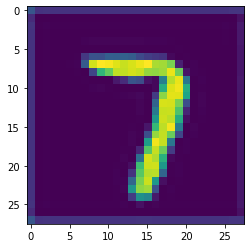

In [62]:
import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()

In [67]:
model.predict([tv])[0]

'7'

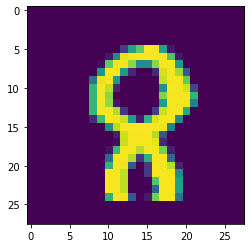

In [55]:
plt.imshow(X_train[3].reshape(28,28))